In [25]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline

In [81]:
import pandas as pd
df = pd.read_csv('ANSUR_II.csv', encoding='latin-1')

In [32]:
df.shape

(4082, 108)

In [34]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [35]:
for col in df.columns: print(col)

subjectid
abdominalextensiondepthsitting
acromialheight
acromionradialelength
anklecircumference
axillaheight
balloffootcircumference
balloffootlength
biacromialbreadth
bicepscircumferenceflexed
bicristalbreadth
bideltoidbreadth
bimalleolarbreadth
bitragionchinarc
bitragionsubmandibulararc
bizygomaticbreadth
buttockcircumference
buttockdepth
buttockheight
buttockkneelength
buttockpopliteallength
calfcircumference
cervicaleheight
chestbreadth
chestcircumference
chestdepth
chestheight
crotchheight
crotchlengthomphalion
crotchlengthposterioromphalion
earbreadth
earlength
earprotrusion
elbowrestheight
eyeheightsitting
footbreadthhorizontal
footlength
forearmcenterofgriplength
forearmcircumferenceflexed
forearmforearmbreadth
forearmhandlength
functionalleglength
handbreadth
handcircumference
handlength
headbreadth
headcircumference
headlength
heelanklecircumference
heelbreadth
hipbreadth
hipbreadthsitting
iliocristaleheight
interpupillarybreadth
interscyei
interscyeii
kneeheightmidpatella
k

# Visually detecting redundant features

In [138]:
df1 = df[['Heightin', 'stature', 'weightkg', 'Weightlbs']].copy()

In [139]:
df1['constant'] = 10

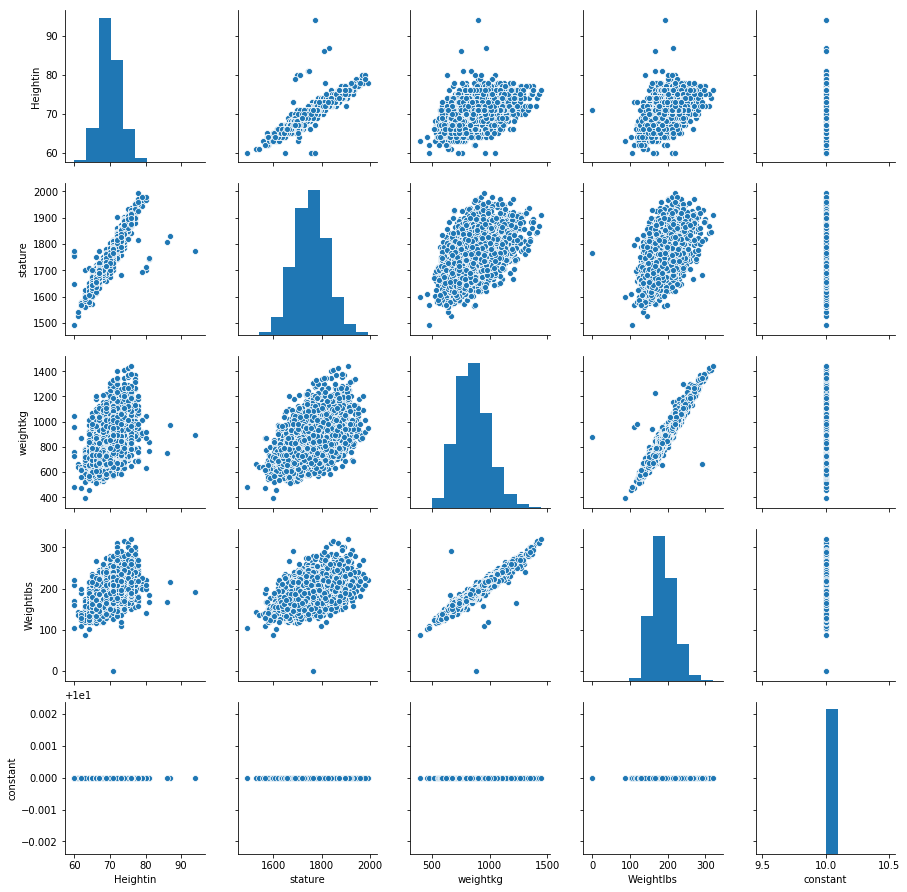

In [52]:
sns.pairplot(data=df1)

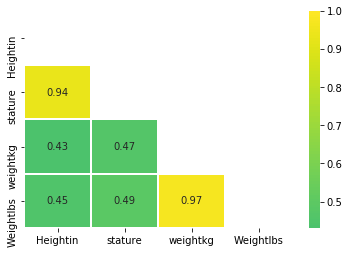

In [148]:
# Create the correlation matrix
corr = df1.drop('constant', axis=1).corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap='viridis', center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [53]:
df1.drop(['Heightin', 'Weightlbs', 'constant'], axis=1, inplace=True)

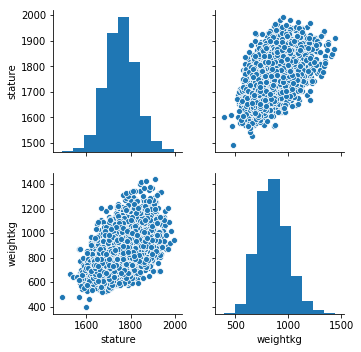

In [54]:
sns.pairplot(data=df1)

## t-SNE visualization of high-dimensional data

In [55]:
# Rrimeiro, vamos remover as variáveis não numéricas

In [65]:
non_floats = []
for col in df:
    if df[col].dtypes != "float64" and df[col].dtypes != "int64":
        non_floats.append(col)
non_floats

['Gender',
 'Date',
 'Installation',
 'Component',
 'Branch',
 'PrimaryMOS',
 'SubjectsBirthLocation',
 'Ethnicity',
 'WritingPreference']

In [67]:
df1 = df.drop(non_floats, axis=1)

In [68]:
from sklearn.manifold import TSNE

In [69]:
m = TSNE(learning_rate=50)

In [71]:
tsne_features = m.fit_transform(df1)
print(tsne_features)

[[-44.528973  38.328957]
 [-44.699257  39.234882]
 [-44.301926  37.72445 ]
 ...
 [ 34.85568  -28.272924]
 [ 32.68145  -29.49607 ]
 [ 47.2297   -29.983131]]


In [76]:
x = tsne_features[:,0]
y = tsne_features[:,1]

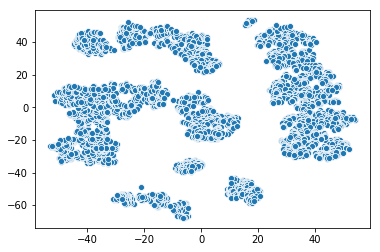

In [78]:
sns.scatterplot(x,y)

In [83]:
df['x'] = x
df['y'] = y

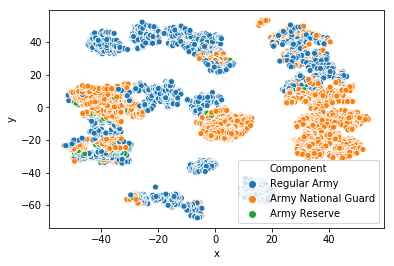

In [85]:
sns.scatterplot('x', 'y', data=df, hue='Component')

In [109]:
def bmi(weight, height):
    bmi = weight / (height * height)
    bmi = bmi*100000

    if bmi < 18.5:
        return 'Underweight'
    elif bmi > 25:
        return 'Overweight'
    else:
        return 'Normal'


In [127]:
df['BMI'] = df.apply(lambda x: bmi(x['weightkg'], x['stature']), axis=1)

In [113]:
df1 = df[['Heightin', 'stature', 'weightkg', 'bicepscircumferenceflexed', 'balloffootlength', 'axillaheight', 'acromionradialelength']].copy()

In [114]:
tsne_features = m.fit_transform(df1)
x = tsne_features[:,0]
y = tsne_features[:,1]
df['x'] = x
df['y'] = y

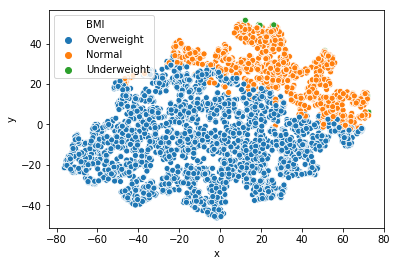

In [115]:
sns.scatterplot('x', 'y', data=df, hue='BMI')

## Atenção: Nem sempre mais features = melhor modelo!!

In [133]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

#Voltando a olhar nossos dados numéricos apenas:
df = pd.read_csv('ANSUR_II.csv', encoding='latin-1')
df['BMI'] = df.apply(lambda x: bmi(x['weightkg'], x['stature']), axis=1)
df1 = df.drop(non_floats, axis=1)

# Select the Gender column as the feature to be predicted (y)
y = df['BMI']

# Remove the Gender column to create the training data
X = df.drop(non_floats, axis=1)
X = X.drop('BMI', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [134]:
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

1225 rows in test set vs. 2857 in training set. 99 Features.


In [135]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


74.1% accuracy on test set vs. 100.0% on training set


In [137]:
# Assign only ONE feature!!!!
X = df[['weightkg']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


86.4% accuracy on test set vs. 88.5% on training set


In [171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='sag', multi_class='multinomial')

In [172]:
#Voltando a olhar nossos dados numéricos apenas:
df = pd.read_csv('ANSUR_II.csv', encoding='latin-1')
df['BMI'] = df.apply(lambda x: bmi(x['weightkg'], x['stature']), axis=1)
df1 = df.drop(non_floats, axis=1)

# Select the Gender column as the feature to be predicted (y)
y = df['BMI']

# Remove the Gender column to create the training data
X = df.drop(non_floats, axis=1)
X = X.drop('BMI', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


97.2% accuracy on test set.
{'subjectid': 0.18, 'abdominalextensiondepthsitting': 0.02, 'acromialheight': 0.08, 'acromionradialelength': 0.25, 'anklecircumference': 0.11, 'axillaheight': 0.13, 'balloffootcircumference': 0.05, 'balloffootlength': 0.17, 'biacromialbreadth': 0.24, 'bicepscircumferenceflexed': 0.37, 'bicristalbreadth': 0.01, 'bideltoidbreadth': 0.07, 'bimalleolarbreadth': 0.02, 'bitragionchinarc': 0.05, 'bitragionsubmandibulararc': 0.05, 'bizygomaticbreadth': 0.03, 'buttockcircumference': 0.44, 'buttockdepth': 0.3, 'buttockheight': 0.07, 'buttockkneelength': 0.01, 'buttockpopliteallength': 0.06, 'calfcircumference': 0.32, 'cervicaleheight': 0.07, 'chestbreadth': 0.06, 'chestcircumference': 0.57, 'chestdepth': 0.39, 'chestheight': 0.04, 'crotchheight': 0.08, 'crotchlengthomphalion': 0.08, 'crotchlengthposterioromphalion': 0.13, 'earbreadth': 0.01, 'earlength': 0.0, 'earprotrusion': 0.0, 'elbowrestheight': 0.22, 'eyeheightsitting': 0.24, 'footbreadthhorizontal': 0.07, 'footl

C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


In [154]:
from sklearn.feature_selection import RFE

In [173]:
# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(solver='sag', multi_class='multinomial'), n_features_to_select=10, verbose=0)

# Fit the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\rodribia\PycharmProjects\initiative\venv\li

C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\rodribia\PycharmProjects\initiative\venv\li

C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\rodribia\PycharmProjects\initiative\venv\li

{'subjectid': 76, 'abdominalextensiondepthsitting': 20, 'acromialheight': 12, 'acromionradialelength': 69, 'anklecircumference': 30, 'axillaheight': 2, 'balloffootcircumference': 50, 'balloffootlength': 86, 'biacromialbreadth': 29, 'bicepscircumferenceflexed': 1, 'bicristalbreadth': 77, 'bideltoidbreadth': 27, 'bimalleolarbreadth': 89, 'bitragionchinarc': 78, 'bitragionsubmandibulararc': 71, 'bizygomaticbreadth': 80, 'buttockcircumference': 1, 'buttockdepth': 10, 'buttockheight': 40, 'buttockkneelength': 66, 'buttockpopliteallength': 54, 'calfcircumference': 1, 'cervicaleheight': 1, 'chestbreadth': 38, 'chestcircumference': 1, 'chestdepth': 8, 'chestheight': 4, 'crotchheight': 44, 'crotchlengthomphalion': 31, 'crotchlengthposterioromphalion': 68, 'earbreadth': 85, 'earlength': 84, 'earprotrusion': 79, 'elbowrestheight': 59, 'eyeheightsitting': 16, 'footbreadthhorizontal': 83, 'footlength': 63, 'forearmcenterofgriplength': 45, 'forearmcircumferenceflexed': 14, 'forearmforearmbreadth': 1

C:\Users\rodribia\PycharmProjects\initiative\venv\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [175]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
# Wrap the feature eliminator around the random forest model
rfe = RFE(estimator=RandomForestClassifier(random_state=42, n_estimators=20), n_features_to_select=10, verbose=1)

# Fit the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 fe